In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [47]:
def load_ppo_data(file_path,num=5,maxepoch=100,spacing=5,dataname='alo'):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(num):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i][0:]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i][0:]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i][0:]
        train_epoch = np.arange(1,maxepoch+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':dataname})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0,ignore_index=True)
    return total_data

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]


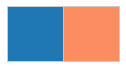

In [54]:
sns.set_theme(context='paper', style='whitegrid', font='Arial', font_scale=1.8)
# color = sns.color_palette('Paired',10)
color=[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]
sns.palplot(color)
sns.set_palette(color)
print(color)

In [49]:
vdn2d = load_ppo_data('vdn-2d',maxepoch=10,spacing=1,dataname='VDN')
ppo2d = load_ppo_data('ppo-2d',maxepoch=10,spacing=1,dataname='Baseline')

In [50]:
data_2d = pd.concat([vdn2d,ppo2d],axis=0,ignore_index=True)
# last  = vdn2d[vdn2d['Train epoch']==100]
# x_app,y_app = append_data(100,400,last)

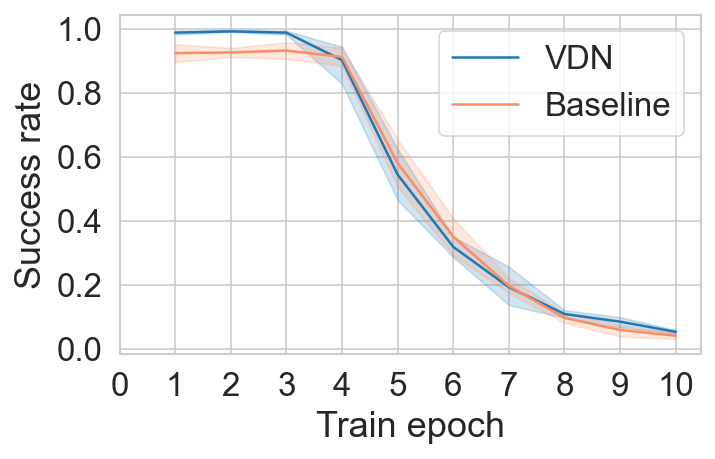

In [55]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_2d)
ax = plt.gca()
ax.set_xticks(range(0,11,1))
ax.set_yticks(np.arange(0,1.1,0.2))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

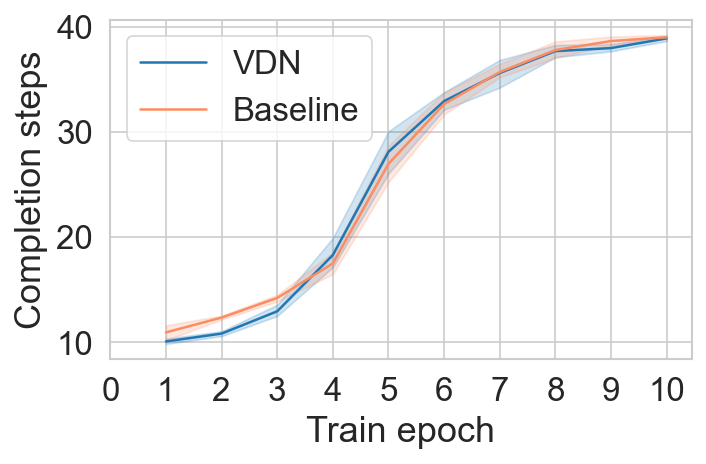

In [56]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=data_2d)
ax = plt.gca()
ax.set_xticks(range(0,11,1))
# ax.set_yticks(np.arange(0,1.1,0.2))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

In [58]:
vdn3d = load_ppo_data('vdn-3d',maxepoch=10,spacing=1,dataname='VDN')
ppo3d = load_ppo_data('ppo-3d',maxepoch=10,spacing=1,dataname='Baseline')
data_3d = pd.concat([vdn2d,ppo2d],axis=0,ignore_index=True)

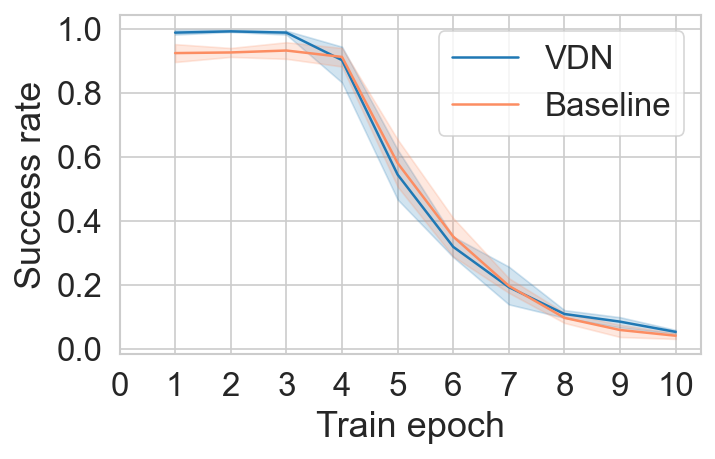

In [60]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_3d)
ax = plt.gca()
ax.set_xticks(range(0,11,1))
ax.set_yticks(np.arange(0,1.1,0.2))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

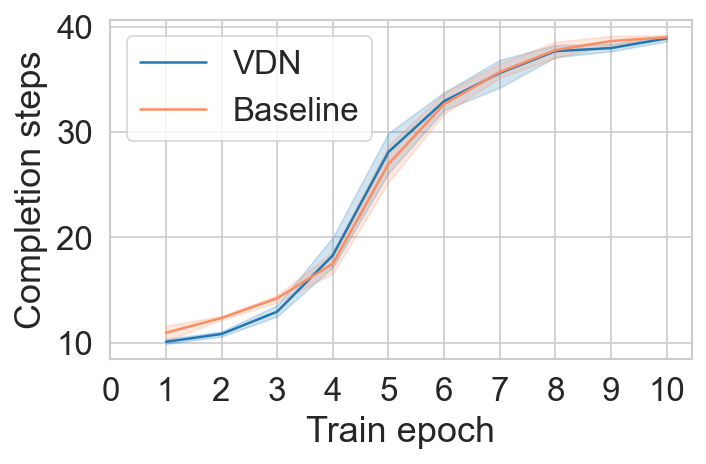

In [61]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=data_2d)
ax = plt.gca()
ax.set_xticks(range(0,11,1))
# ax.set_yticks(np.arange(0,1.1,0.2))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

In [ ]:
data_3d = pd.concat([vdn3d,ppo3d],axis=0,ignore_index=True)
last  = vdn3d[vdn3d['Train epoch']==100]
x_app,y_app = append_data(100,450,last)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=200)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_3d)
ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

In [ ]:
fig,ax1 = plt.subplots(dpi=200,figsize=(5,3))
ax1 = sns.lineplot(x='Train epoch',y='Steps',hue='schema',data=data_3d)
ax1 = plt.plot(x_app,y_app['step'],linestyle = '--',color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

In [ ]:
fig,ax1 = plt.subplots(dpi=200,figsize=(5,3))
ax1 = sns.lineplot(x='Train epoch',y='Rewards',hue='schema',data=data_3d)
ax1.get_legend().set_title(None)
ax1 = plt.plot(x_app,y_app['reward'],linestyle = '--',color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

In [ ]:
vdn4d = load_vdn_data('vdn-4d',maxepoch=100,space=5)
ppo4d = load_ppo_data('ppo-4d',maxepoch=450,spacing=5)

In [ ]:
data_4d = pd.concat([vdn4d,ppo4d],axis=0,ignore_index=True)
last  = vdn4d[vdn4d['Train epoch']==100]
x_app,y_app = append_data(100,450,last)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=100)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_4d)
ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

In [ ]:
max(data_4d['Success rate'])